In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

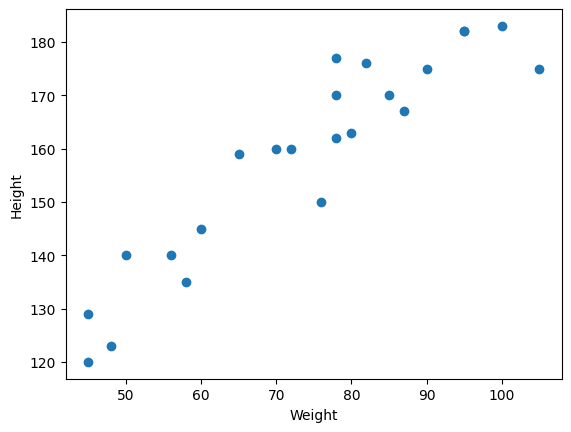

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


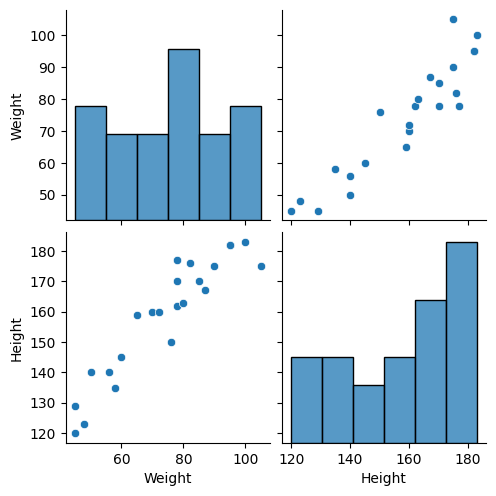

In [12]:
import seaborn as sns
sns.pairplot(df)

In [17]:
#Independent and Dependent features
X= df[['Weight']]
Y= df['Height'] # This varialbe can be in Series form
# Here [[]] means that we crate a DataFrame with one column not a series
np.array(X).shape

(23, 1)

In [15]:
X_Series = df['Weight']
# Here [] means that we crate a Series with one column not a DataFrame
np.array(X_Series).shape
# So we get a 1D array with one column not a 2D array with one column

(23,)

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#random state is used to get the same split every time we run the code


In [20]:
## Standarization
## if i apply z score to X_train and X_test separately, then the mean and std will be different
## This changes mean to 0 and std to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [21]:
# Difference between fit and fit_transform
# fit_transform is used to fit the data and then transform it in one step
#So transform is used to transform the data after it has been fitted

X_test=scaler.transform(X_test)
# Here we use transform because we want to use the same scaler that was fitted on the training data
# to transform the test data, so that the test data is in the same scale as the training data
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [ ]:
## Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
#check all the paramters of LinearRegression from sklearn


In [23]:
regression.fit(X_train, Y_train)

LinearRegression()

In [25]:
regression.coef_  # Coefficients of the linear regression model

array([17.03440872])

In [26]:
regression.intercept_

157.5

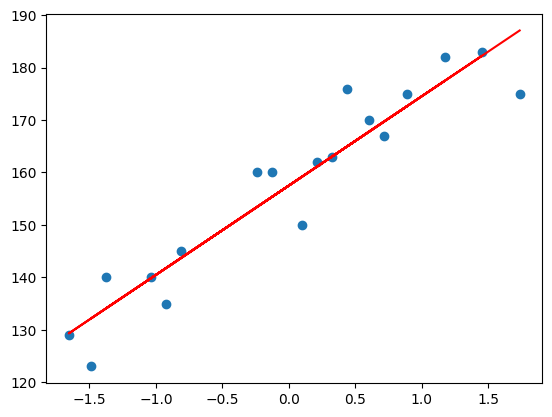

In [ ]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train), color='red')
# We can see that the line is fitted to the data points

In [28]:
## Prediction for the test data
Y_pred = regression.predict(X_test)

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
## r2 score is the proportion of variance explained by the model
## r2 mathematically is 1 - (SS_res / SS_tot) where SS_res is the residual sum of squares and SS_tot is the total sum of squares
## it is written as 1 - (1 - r2) * (n-1)/(n-k-1) where n is the number of samples and k is the number of features
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 109.77592599051664
R^2 Score: 0.776986986042344


In [30]:
#Adjusted R^2 Score
n = len(Y_test)  # Number of samples in the test set
k = X_test.shape[1]  # Number of features in the test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R^2 Score: {adjusted_r2}')

Adjusted R^2 Score: 0.7026493147231252


In [32]:
## OLS (Ordinary Least Squares) Regression
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)  # Adding a constant term for the intercept
ols_model = sm.OLS(Y_train, X_train_ols).fit()  # Fitting the OLS model
print(ols_model.summary())  # Displaying the summary of the OLS model

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           3.53e-09
Time:                        20:00:26   Log-Likelihood:                -57.473
No. Observations:                  18   AIC:                             118.9
Df Residuals:                      16   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.5000      1.474    106.879      0.0

c:\Users\hgp99\OneDrive\Desktop\AI-ML-DS\.venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
##Prediction for new data
regression.predict(scaler.transform([[70]]))  # Predicting height for a weight of 70 kg

c:\Users\hgp99\OneDrive\Desktop\AI-ML-DS\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.38030364])

In [ ]:
## So OLS is used to get the summary of the model and the coefficients
## Linear Regression is used to make predictions
# OLS gives more information about the model, like p-values, confidence intervals, etc.
# Linear Regression is used to make predictions and get the coefficients
# OLS is more interpretable and gives more information about the model
# Linear Regression is more efficient and faster to compute